# Reading the QVI_purchase_behaviour dataset

In [1]:
import pandas as pd
df =pd.read_csv(r"C:\Users\Lenovo\Downloads\QVI_purchase_behaviour.csv")

# Reading the QVI_transaction_data dataset

In [3]:
pf=pd.read_excel(r"C:\Users\Lenovo\Downloads\QVI_transaction_data.xlsx")

# Cleaning the df dataset first.

In [5]:
df.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


# checking for null values

In [6]:
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

# checking for unique values and unique values counts

In [7]:
df["LYLTY_CARD_NBR"].nunique()

72637

In [8]:
df["LIFESTAGE"].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

# Cleaning the df dataset now

# Checking for null values

In [9]:
pf.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

# Correcting the datatype of the "DATE" column

In [10]:
pf["DATE"]=pd.to_datetime(pf["DATE"])

In [11]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


# "Date" column has unwanted data other than Dates, that needs to be cleaned.

In [13]:
pf["DATE"]=pf["DATE"].astype(str)

In [14]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [15]:
pf["DATE"]=pf["DATE"].str.split(" ").str[0]

# Achieved an proper "Date" column

# Checking the "STORE_NBR" column

In [17]:
pf["STORE_NBR"].nunique()

272

In [18]:
pf["STORE_NBR"].value_counts()

STORE_NBR
226    2022
88     1873
93     1832
165    1819
237    1785
       ... 
11        2
252       2
206       2
92        1
76        1
Name: count, Length: 272, dtype: int64

#Checking the "PROD_NAME" column

In [19]:
pf["PROD_NAME"].head(10)

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
5    Old El Paso Salsa   Dip Tomato Mild 300g
6    Smiths Crinkle Chips Salt & Vinegar 330g
7       Grain Waves         Sweet Chilli 210g
8     Doritos Corn Chip Mexican Jalapeno 150g
9       Grain Waves Sour    Cream&Chives 210G
Name: PROD_NAME, dtype: object

In [20]:
pf["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

# "PROD_NAME" column has product names as well as the quantities, that needs to be separated in the different column.

In [22]:
pf["PROD_QUANTITY"]=pf["PROD_NAME"].str.strip().str.split(" ").str[-1]

In [23]:
pf["PROD_QUANTITY"].unique()

array(['SeaSalt175g', '175g', '170g', '150g', '300g', '330g', '210g',
       '210G', '270g', '220g', '125g', '110g', '134g', '150G',
       'Chli&S/Cream175G', 'Chckn175g', '380g', 'Chicken270g', '180g',
       '165g', 'Salt', '250g', 'Ht300g', 'Chs&Onion170g', '200g', '160g',
       'CutSalt/Vinegr175g', '190g', '90g', '70g'], dtype=object)

In [25]:
pf["PROD_NAME"].str.strip().str.split("  ").str[0]

0                                     Natural Chip
1                                 CCs Nacho Cheese
2                               Smiths Crinkle Cut
3                               Smiths Chip Thinly
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832                          Tostitos Splash Of
264833                            Doritos Mexicana
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835                          Tostitos Splash Of
Name: PROD_NAME, Length: 264836, dtype: object

In [26]:
pf['Cleaned_Quantity'] = pf['PROD_NAME'].str.extract(r'(\d+g|\d+G)')

In [28]:
pf["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [29]:
# Removing the quantities from the 'PROD_NAME' column
pf['PROD_NAME'] = pf['PROD_NAME'].str.replace(r'\d+[gG]', '', regex=True)

# Clean up extra spaces and special characters
pf['PROD_NAME'] = pf['PROD_NAME'].str.replace(r'[^\w\s&]', '', regex=True)

# Strip leading and trailing spaces
pf['PROD_NAME'] = pf['PROD_NAME'].str.strip()

In [31]:
pf.drop(columns=["PROD_QUANTITY"],inplace=True)

# The data is clean,now checking for outliers.

In [33]:
pf["PROD_QTY"].unique()

array([  2,   3,   5,   1,   4, 200], dtype=int64)

# Checking the outliers using boxplot.

In [34]:
import seaborn as sns

<Axes: ylabel='PROD_QTY'>

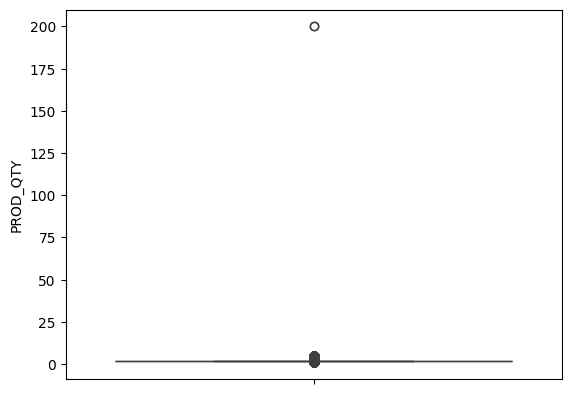

In [35]:
sns.boxplot(pf["PROD_QTY"])

In [36]:
pf["PROD_QTY"].unique()

array([  2,   3,   5,   1,   4, 200], dtype=int64)

In [37]:
pf["PROD_QTY"].value_counts()

PROD_QTY
2      236039
1       27518
5         450
3         430
4         397
200         2
Name: count, dtype: int64

# The outliers need to be removed

In [38]:
pf=pf[~(pf["PROD_QTY"]==200)]

In [39]:
pf["PROD_QTY"].unique()

array([2, 3, 5, 1, 4], dtype=int64)

# Checking rest of the columns

In [41]:
pf["TOT_SALES"].dtypes

dtype('float64')

In [42]:
pf["TOT_SALES"].unique()

array([ 6.  ,  6.3 ,  2.9 , 15.  , 13.8 ,  5.1 ,  5.7 ,  3.6 ,  3.9 ,
        7.2 , 23.  ,  9.2 ,  1.7 ,  3.3 ,  2.1 ,  3.  ,  3.8 ,  5.4 ,
        2.7 ,  3.7 , 14.8 ,  4.4 ,  6.6 ,  2.6 ,  3.25,  4.6 ,  5.8 ,
       15.5 ,  7.8 ,  4.2 ,  7.4 ,  7.6 ,  8.4 ,  6.5 ,  4.3 , 28.5 ,
        7.5 ,  3.4 , 19.  , 11.8 , 17.6 ,  9.  , 13.2 ,  1.9 , 10.2 ,
       13.  , 15.2 , 11.4 , 14.5 ,  5.6 , 10.8 , 10.4 ,  1.5 , 16.5 ,
        1.8 ,  5.2 ,  5.9 , 18.4 ,  8.8 , 18.5 ,  6.2 ,  4.8 ,  8.6 ,
        2.8 ,  2.3 ,  3.1 ,  2.4 , 15.6 , 19.5 , 27.  ,  9.9 , 16.2 ,
       13.5 , 21.6 , 23.6 , 29.5 , 12.6 ,  8.1 , 15.3 , 11.1 , 22.  ,
        9.5 , 16.25, 20.4 , 11.7 , 22.8 ,  9.6 ,  8.5 , 10.5 , 21.  ,
       12.  , 14.4 ,  9.75, 16.8 , 25.5 , 17.7 , 17.2 , 17.1 ,  4.5 ,
        6.8 , 18.  , 12.9 , 11.5 ,  8.7 , 14.  , 11.6 , 12.4 , 21.5 ,
        9.3 , 11.2 ,  6.9 ])

In [43]:
pf["TOT_SALES"].value_counts()

TOT_SALES
9.2     22821
7.4     22513
6.0     20798
7.6     20212
8.8     19900
        ...  
15.5        3
9.3         3
6.9         3
12.4        2
11.2        2
Name: count, Length: 111, dtype: int64

In [44]:
pf["Cleaned_Quantity"].value_counts()

Cleaned_Quantity
175g    64929
150g    41633
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6416
270g     6285
200g     4473
135g     3257
250g     3169
210g     3167
210G     3105
90g      3008
190g     2995
160g     2970
220g     1564
70g      1507
150G     1498
180g     1468
175G     1461
125g     1454
Name: count, dtype: int64

# Both the datesets are cleaned and ready to be merged based on common column.

In [ ]:
c=pd.merge(df,pf,on="LYLTY_CARD_NBR")


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Cleaned_Quantity
0,1000,YOUNG SINGLES/COUPLES,Premium,1970-01-01,1,1,5,Natural Chip Compny SeaSalt,2,6.0,175g
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1970-01-01,1,2,58,Red Rock Deli Chikn&Garlic Aioli,1,2.7,150g
2,1003,YOUNG FAMILIES,Budget,1970-01-01,1,3,52,Grain Waves Sour Cream&Chives,1,3.6,210G
3,1003,YOUNG FAMILIES,Budget,1970-01-01,1,4,106,Natural ChipCo Hony Soy Chckn,1,3.0,175g
4,1004,OLDER SINGLES/COUPLES,Mainstream,1970-01-01,1,5,96,WW Original Stacked Chips,1,1.9,160g
...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,YOUNG FAMILIES,Mainstream,1970-01-01,88,240378,24,Grain Waves Sweet Chilli,2,7.2,210g
264830,2370751,YOUNG FAMILIES,Premium,1970-01-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic,2,9.2,150g
264831,2370961,OLDER FAMILIES,Budget,1970-01-01,88,240480,70,Tyrrells Crisps Lightly Salted,2,8.4,165g
264832,2370961,OLDER FAMILIES,Budget,1970-01-01,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht,2,10.2,300g


In [48]:
c.dtypes

LYLTY_CARD_NBR        int64
LIFESTAGE            object
PREMIUM_CUSTOMER     object
DATE                 object
STORE_NBR             int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
Cleaned_Quantity     object
dtype: object

In [49]:
c["DATE"]=pd.to_datetime(c["DATE"])

In [50]:
c["PREMIUM_CUSTOMER"].value_counts()

PREMIUM_CUSTOMER
Mainstream    101988
Budget         93157
Premium        69689
Name: count, dtype: int64

In [51]:
c[["PREMIUM_CUSTOMER","PROD_NAME"]].groupby("PREMIUM_CUSTOMER").size()

PREMIUM_CUSTOMER
Budget         93157
Mainstream    101988
Premium        69689
dtype: int64

In [52]:
c.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'DATE', 'STORE_NBR',
       'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES',
       'Cleaned_Quantity'],
      dtype='object')

In [53]:
# Group by 'LIFESTAGE' and 'PREMIUM_CUSTOMER', summing the 'PROD_QTY'
customer_chip_purchases = c[["LIFESTAGE", "PREMIUM_CUSTOMER", "PROD_QTY"]].groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).sum()

# Sort the results by 'PROD_QTY' in ascending order
sorted_purchases = customer_chip_purchases.sort_values(by="PROD_QTY", ascending=True)

# Display the top 2 results
top_customer_segments = sorted_purchases.head(2)

# Show the result
print(top_customer_segments)


                               PROD_QTY
LIFESTAGE    PREMIUM_CUSTOMER          
NEW FAMILIES Premium               2957
             Mainstream            4319


In [54]:
customer_chip_purchases

PROD_QTY
LIFESTAGE              PREMIUM_CUSTOMER          
MIDAGE SINGLES/COUPLES Budget                9496
                       Mainstream           22699
                       Premium              15526
NEW FAMILIES           Budget                5571
                       Mainstream            4319
                       Premium               2957
OLDER FAMILIES         Budget               45065
                       Mainstream           27756
                       Premium              21771
OLDER SINGLES/COUPLES  Budget               35220
                       Mainstream           34997
                       Premium              33986
RETIREES               Budget               28764
                       Mainstream           40518
                       Premium              24884
YOUNG FAMILIES         Budget               37111
                       Mainstream           25044
                       Premium              22406
YOUNG SINGLES/COUPLES  Budget               16671
                       Mainstream           38632
                       Premium              11331

# Analyze Total Sales by Customer Segments

In [55]:
# Total sales by LIFESTAGE and PREMIUM_CUSTOMER
segment_sales = c[["TOT_SALES", "LIFESTAGE", "PREMIUM_CUSTOMER"]].groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).mean().sort_values(by="TOT_SALES", ascending=False)

# Display the result
print(segment_sales)


                                         TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Mainstream         7.647284
YOUNG SINGLES/COUPLES  Mainstream         7.558339
RETIREES               Premium            7.456174
OLDER SINGLES/COUPLES  Premium            7.449766
RETIREES               Budget             7.443445
OLDER SINGLES/COUPLES  Budget             7.430315
NEW FAMILIES           Mainstream         7.317806
                       Budget             7.297321
YOUNG FAMILIES         Budget             7.287201
OLDER SINGLES/COUPLES  Mainstream         7.282116
OLDER FAMILIES         Budget             7.269570
YOUNG FAMILIES         Premium            7.266756
OLDER FAMILIES         Mainstream         7.262395
RETIREES               Mainstream         7.252262
NEW FAMILIES           Premium            7.231655
OLDER FAMILIES         Premium            7.208079
YOUNG FAMILIES         Mainstream         7.189025
MIDAGE SINGLES/COUPLES Premium 

#### Top Spender: MIDAGE SINGLES/COUPLES (Mainstream) has the highest average sales (7.65), indicating they are the biggest spenders.

#### Mainstream Advantage: Mainstream customers generally spend more than Budget and Premium customers across most life stages.

#### Lower Spending in Premium: RETIREES (Premium) have lower average sales (7.46) compared to Mainstream customers, suggesting an opportunity for targeted promotions.

#### Focus Marketing: Consider targeting the MIDAGE SINGLES/COUPLES (Mainstream) group with tailored marketing strategies to boost sales further.

# Quantity Purchased by Customer Segments

In [56]:
# Total quantity by LIFESTAGE and PREMIUM_CUSTOMER
segment_quantity = c[["PROD_QTY", "LIFESTAGE", "PREMIUM_CUSTOMER"]].groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).mean().sort_values(by="PROD_QTY", ascending=False)

# Display the result
print(segment_quantity)

                                         PROD_QTY
LIFESTAGE              PREMIUM_CUSTOMER          
OLDER FAMILIES         Mainstream        1.948610
                       Budget            1.945812
                       Premium           1.945576
YOUNG FAMILIES         Budget            1.940749
                       Mainstream        1.940342
                       Premium           1.937732
OLDER SINGLES/COUPLES  Premium           1.914273
                       Budget            1.913403
MIDAGE SINGLES/COUPLES Mainstream        1.911656
OLDER SINGLES/COUPLES  Mainstream        1.910525
RETIREES               Premium           1.900122
                       Budget            1.892244
MIDAGE SINGLES/COUPLES Budget            1.891633
                       Premium           1.889727
RETIREES               Mainstream        1.887543
NEW FAMILIES           Premium           1.860919
                       Mainstream        1.857634
                       Budget            1.853910


#### Older Families Lead: OLDER FAMILIES have the highest average quantity purchased, especially in the Mainstream segment (1.95).

#### Young Families Consistency: YOUNG FAMILIES show strong purchasing across all categories, particularly in Budget (1.94).

#### Retirees' Premium Preference: RETIREES prefer Premium products over Mainstream and Budget (1.90 vs. 1.89).

#### Overall, focus on Older and Young Families for sales growth, while developing strategies for Young Singles/Couples to increase engagement.

# Identify Top Brands by Sales

In [57]:
# Total sales by product name (brand)
brand_sales = c[["TOT_SALES", "PROD_NAME"]].groupby("PROD_NAME").mean().sort_values(by="TOT_SALES", ascending=False)

# Display the result
print(brand_sales)

                                     TOT_SALES
PROD_NAME                                     
Dorito Corn Chp     Supreme          12.268929
Smiths Crnkle Chip  Orgnl Big Bag    11.248871
Doritos Cheese      Supreme          10.940564
Smiths Crinkle      Original         10.917441
Cheezels Cheese                      10.891362
...                                        ...
WW Crinkle Cut      Original          3.214326
Sunbites Whlegrn    Crisps FrchOnin   3.212430
WW Crinkle Cut      Chicken           3.205317
Woolworths Mild     Salsa             2.840040
Woolworths Medium   Salsa             2.832168

[114 rows x 1 columns]


### Top Sellers:
#### Dorito Corn Chips Supreme leads with average sales of 12.27. Smiths Crinkle Chips Original Big Bag follows at 11.25.

### Brand Dominance:
#### Smiths and Doritos are the most popular brands, indicating strong consumer loyalty.

### Sales Range:
#### Lowest-selling products, like Woolworths Mild Salsa (average sales of 2.84), suggest potential areas for improvement.

# Analyze Popular Pack Sizes

In [58]:
# Total sales by pack size
pack_size_sales = c[["TOT_SALES", "Cleaned_Quantity"]].groupby("Cleaned_Quantity").mean().sort_values(by="TOT_SALES", ascending=False)

# Display the result
print(pack_size_sales)

                  TOT_SALES
Cleaned_Quantity           
380g              11.754925
330g              10.908636
270g               8.818679
250g               8.234995
135g               8.010562
300g               7.472676
175g               7.348217
170g               7.339889
110g               7.270532
150g               7.124389
134g               7.077344
210G               6.875362
210g               6.852163
165g               6.626175
180g               5.836785
175G               5.698152
150G               5.126035
190g               4.812321
70g                4.546782
220g               4.367647
125g               3.942916
160g               3.585051
200g               3.578694
90g                3.216888


#### Key Insights from Pack Size Analysis
#### Best Seller: The 380g pack is the top seller with an average of 11.75 in sales.
#### Popular Sizes: 330g and 270g are also strong performers, averaging 10.91 and 8.82 in sales.
#### Smaller Sizes Lag: Smaller packs (e.g., 70g, 90g) show significantly lower sales.
#### Trend: There’s a clear preference for larger pack sizes, suggesting consumers favor bulk purchases.

 # Visualize Key Insights Using Seaborn
#### Bar Plot for Total Sales by Customer Segments

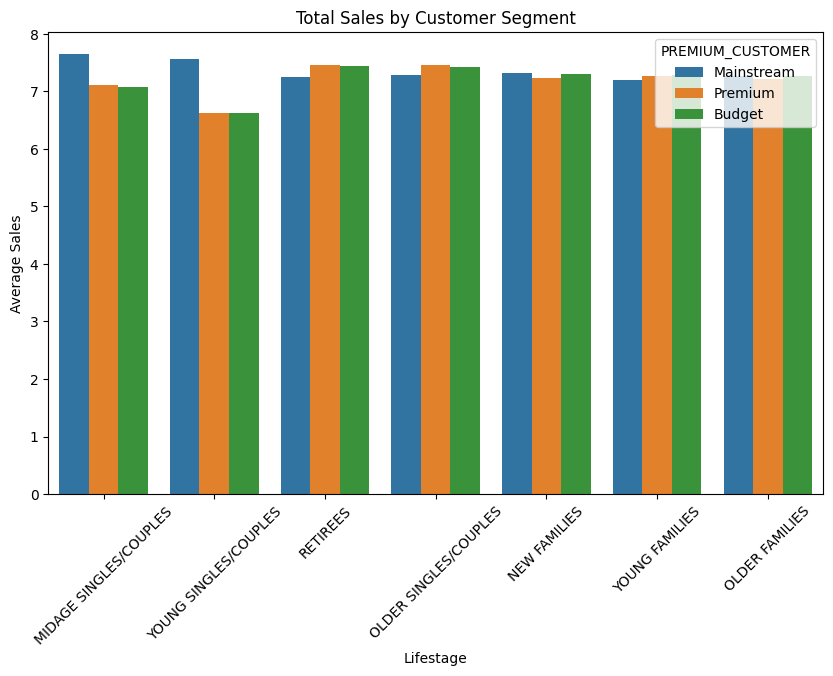

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index to prepare for plotting
segment_sales_reset = segment_sales.reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", data=segment_sales_reset)

# Add title and labels
plt.title("Total Sales by Customer Segment")
plt.ylabel("Average Sales")
plt.xlabel("Lifestage")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


#### The graph shows that average sales increase with customer tier and decrease with lifestage. New Families have the highest sales, while Older Families have the lowest. Premium Customers have the highest sales, while Budget Customers have the lowest.

#### Bar Plot for Popular Brands

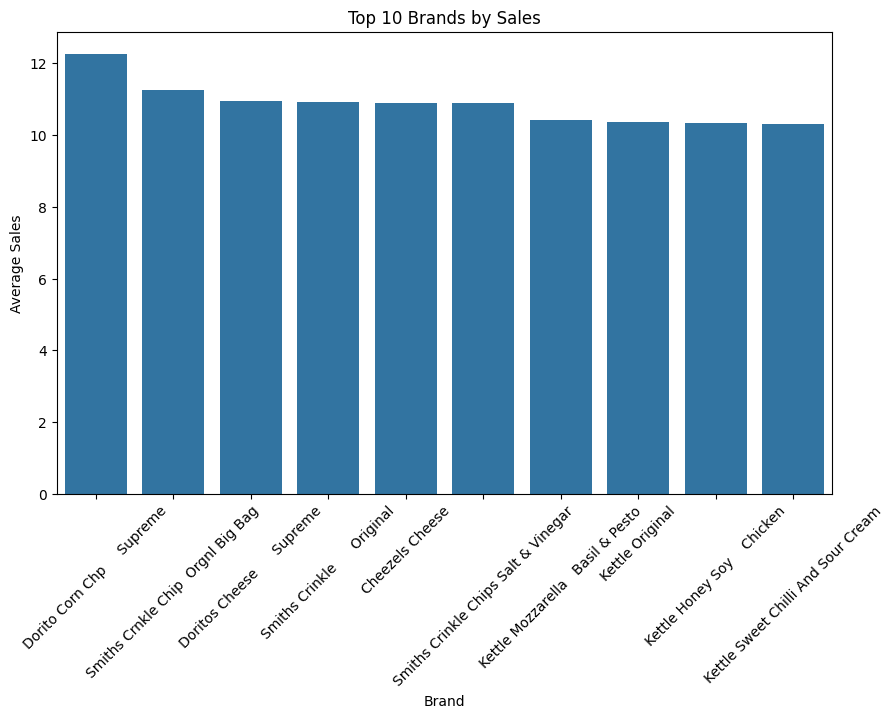

In [60]:
# Reset index to prepare for plotting
brand_sales_reset = brand_sales.reset_index()

# Bar plot for top 10 brands by sales
plt.figure(figsize=(10, 6))
sns.barplot(x="PROD_NAME", y="TOT_SALES", data=brand_sales_reset.head(10))

# Add title and labels
plt.title("Top 10 Brands by Sales")
plt.ylabel("Average Sales")
plt.xlabel("Brand")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


#### The graph shows the average sales of the top 10 brands. Dorito Corn Che Supreme has the highest average sales, followed by Smiths Coke O Cola and Doritos Cheese Supreme. The remaining brands have relatively similar average sales.